In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -qq ./drive/My\ Drive/finance-project.zip

In [4]:
df1 = pd.read_csv('file1.csv')
df2 = pd.read_csv('file2.csv')
df = df1.merge(df2, on='srno_2')

In [5]:
#  一年中最少有換匯過一次之客戶
rsprod_count = df.groupby('srno_2')['rs_prod_4'].sum()
neg_index = rsprod_count[rsprod_count == 0].index
pos_index = rsprod_count[rsprod_count != 0].index

In [6]:
# group by occp and job
occ_job = df1[df1['srno_2'].isin(pos_index)].groupby(['occp', 'job'])['srno_2'].count().sort_values(ascending=False)

In [7]:
occ_job_index = []
occ_job_index.append(occ_job[occ_job.isin([1828, 1676, 1600])].index)
occ_job_index.append(occ_job[occ_job.isin([1330, 1378, 1073, 996])].index)
occ_job_index.append(occ_job[occ_job.isin([1484, 1005])].index)
occ_job_index.append(occ_job[occ_job.isin([779,503,570,599])].index)
occ_job_index.append(occ_job[occ_job.isin([711,761])].index)

In [8]:
### assign group number (0~4)
df1_pos = df1.copy()
df1_pos = df1_pos[df1_pos['srno_2'].isin(pos_index)]
df1_pos.loc[:, 'cluster'] = -1
for i, c in enumerate(occ_job_index):
    for occ, job in c:
        df1_pos.loc[(df1_pos['occp']==occ) & (df1_pos['job']==job), 'cluster'] = i
df1_pos = df1_pos[df1_pos['cluster'] != -1]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
df = df1_pos.merge(df2, on='srno_2')

In [29]:
from matplotlib import colors
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

hc = ['#7590AA', '#C01921']
th = [0, 1]

cdict = NonLinCdict(th, hc)
cm = colors.LinearSegmentedColormap('test', cdict)

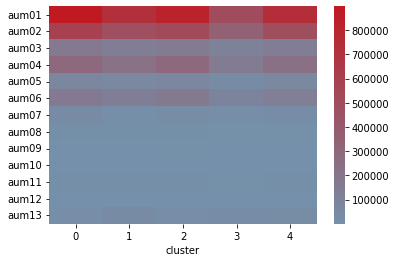

In [32]:
# got all aum assets
aums = df.columns[df.columns.str.contains('aum')]
sns.heatmap(df.groupby('cluster')[aums].mean().transpose(), cmap=cm)

[Text(0, 0.5, 'bill_a1'),
 Text(0, 1.5, 'bill_a2'),
 Text(0, 2.5, 'bill_a3'),
 Text(0, 3.5, 'bill_a4'),
 Text(0, 4.5, 'bill_a5'),
 Text(0, 5.5, 'bill_a6')]

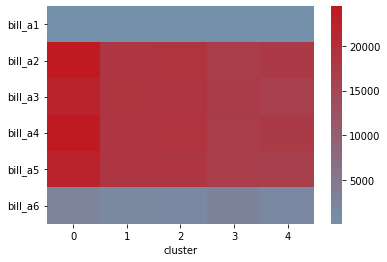

In [41]:
bills = df.columns[df.columns.str.contains('bill')]
ax = sns.heatmap(df.groupby('cluster')[bills].mean().transpose(), cmap=cm)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 0)

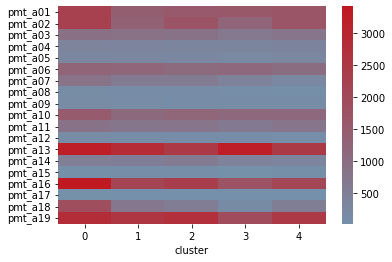

In [34]:
pmtas = df.columns[df.columns.str.contains('pmt_a')]
sns.heatmap(df.groupby('cluster')[pmtas].mean().transpose(), cmap=cm)

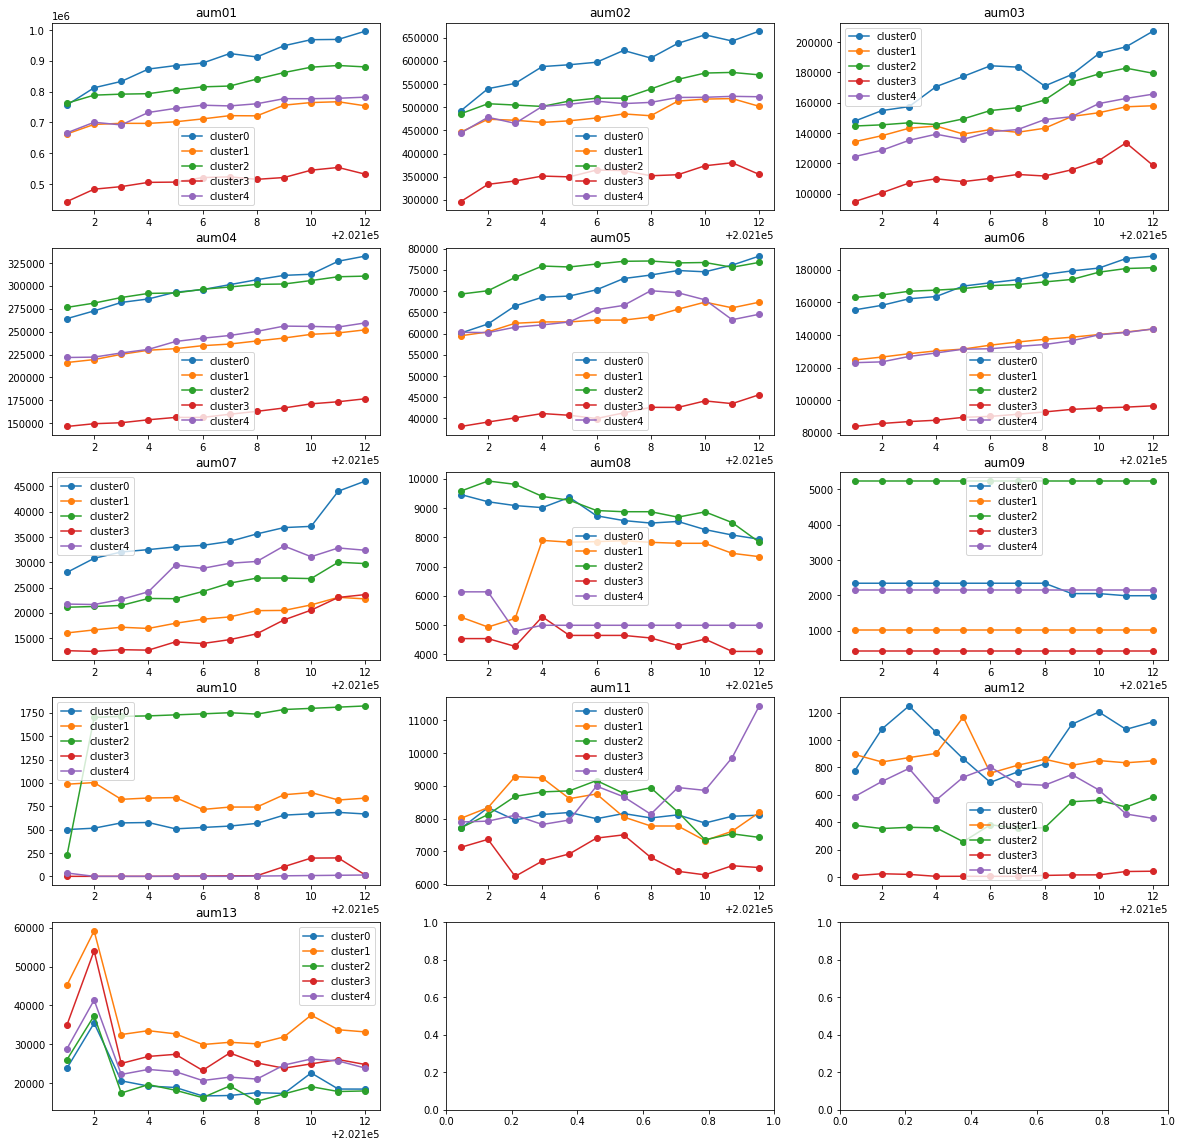

In [ ]:
aum_mean = df.groupby(['cluster', 'yyyymm'])[aums].mean()
palette = sns.color_palette()
fig, ax = plt.subplots(5, 3, figsize=(20,20))
#aum_mean.xs(202101, level=1)
for i, aum in enumerate(aums):
    ax[i//3,i%3].set_title(aum)
    for c in range(5):
        ax[i//3,i%3].plot(aum_mean.xs(c)[aum], marker='o', color=palette[c], label='cluster'+str(c))
    ax[i//3,i%3].legend()

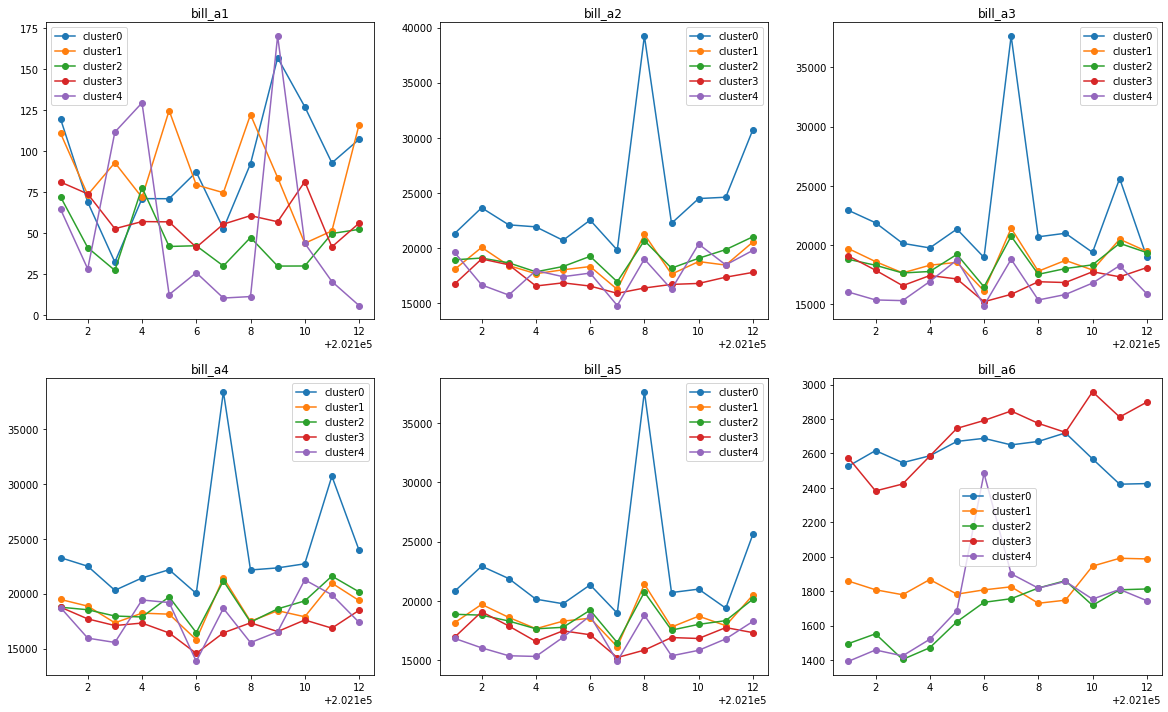

In [ ]:
bill_mean = df.groupby(['cluster', 'yyyymm'])[bills].mean()
palette = sns.color_palette()
fig, ax = plt.subplots(2, 3, figsize=(20,12))
#aum_mean.xs(202101, level=1)
for i, bill in enumerate(bills):
    ax[i//3,i%3].set_title(bill)
    for c in range(5):
        ax[i//3,i%3].plot(bill_mean.xs(c)[bill], marker='o', color=palette[c], label='cluster'+str(c))
    ax[i//3,i%3].legend()

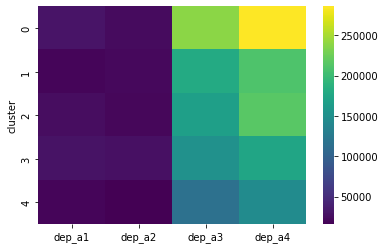

In [ ]:
depa = df.columns[df.columns.str.contains('dep_a')]
sns.heatmap(df.groupby('cluster')[depa].mean(), cmap="viridis")

In [ ]:
circle_data = {}
people = df.groupby('cluster')['srno_2'].count() // 12
c = df.groupby('cluster')[aums].apply(lambda x : x.sum() / x.sum().sum())
circle_data['id'] = 'all'
circle_data['datum'] = people.sum() 
circle_data['children'] = []
for i in people.index:
    temp = {}
    temp['id'] = str(i)
    temp['datum'] = people[i]
    temp['children'] = []
    for aum in aums:
        temp2 = {}
        temp2['id'] = aum
        temp2['datum'] = c.loc[i][aum]
        temp['children'].append(temp2)
    circle_data['children'].append(temp)
circle_data = [circle_data]

In [ ]:
!pip install circlify

In [ ]:
# import the circlify library
import circlify
# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    circle_data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

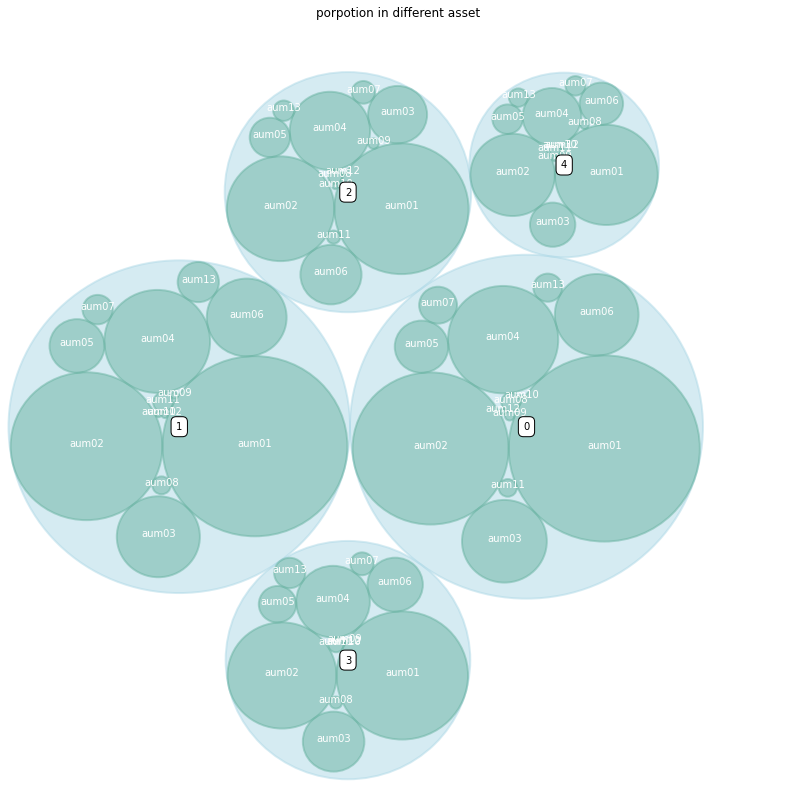

In [ ]:
# import libraries
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
ax.set_title('porpotion in different asset')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))


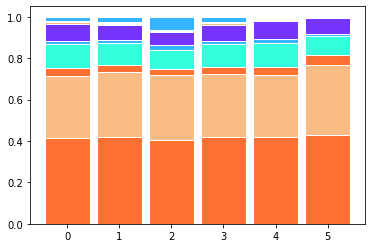

In [ ]:
names = df_aum['job'].unique()
aum_cols = df.columns[df.columns.str.contains('aum')]
colors = ['#FF7133','#f9bc86','#FF7133', '#33FFDD', '#33B5FF', '#7733FF','#f9bc86','#A8FF33', '#33FFDD', '#33B5FF', '#7733FF', '#33FFDD', '#33B5FF',]
bottom = [0 for _ in range(len(names))]

for i, c in enumerate(aum_cols):
    x = a.drop('aum_sum', axis=1)[c].values

    #print(sum(x))
    #print(len(aum_cols))
    if i == 0:
        plt.bar([j for j in range(len(names))], x, color=colors[i], edgecolor='white', width=0.85)
    else:
        plt.bar([j for j in range(len(names))], x, bottom=bottom, color=colors[i], edgecolor='white', width=0.85)
    bottom += x

In [ ]:
#  一年中最少有換匯過一次之客戶
rsprod_count = df.groupby('srno_2')['rs_prod_4'].sum()
neg_index = rsprod_count[rsprod_count == 0].index
pos_index = rsprod_count[rsprod_count != 0].index

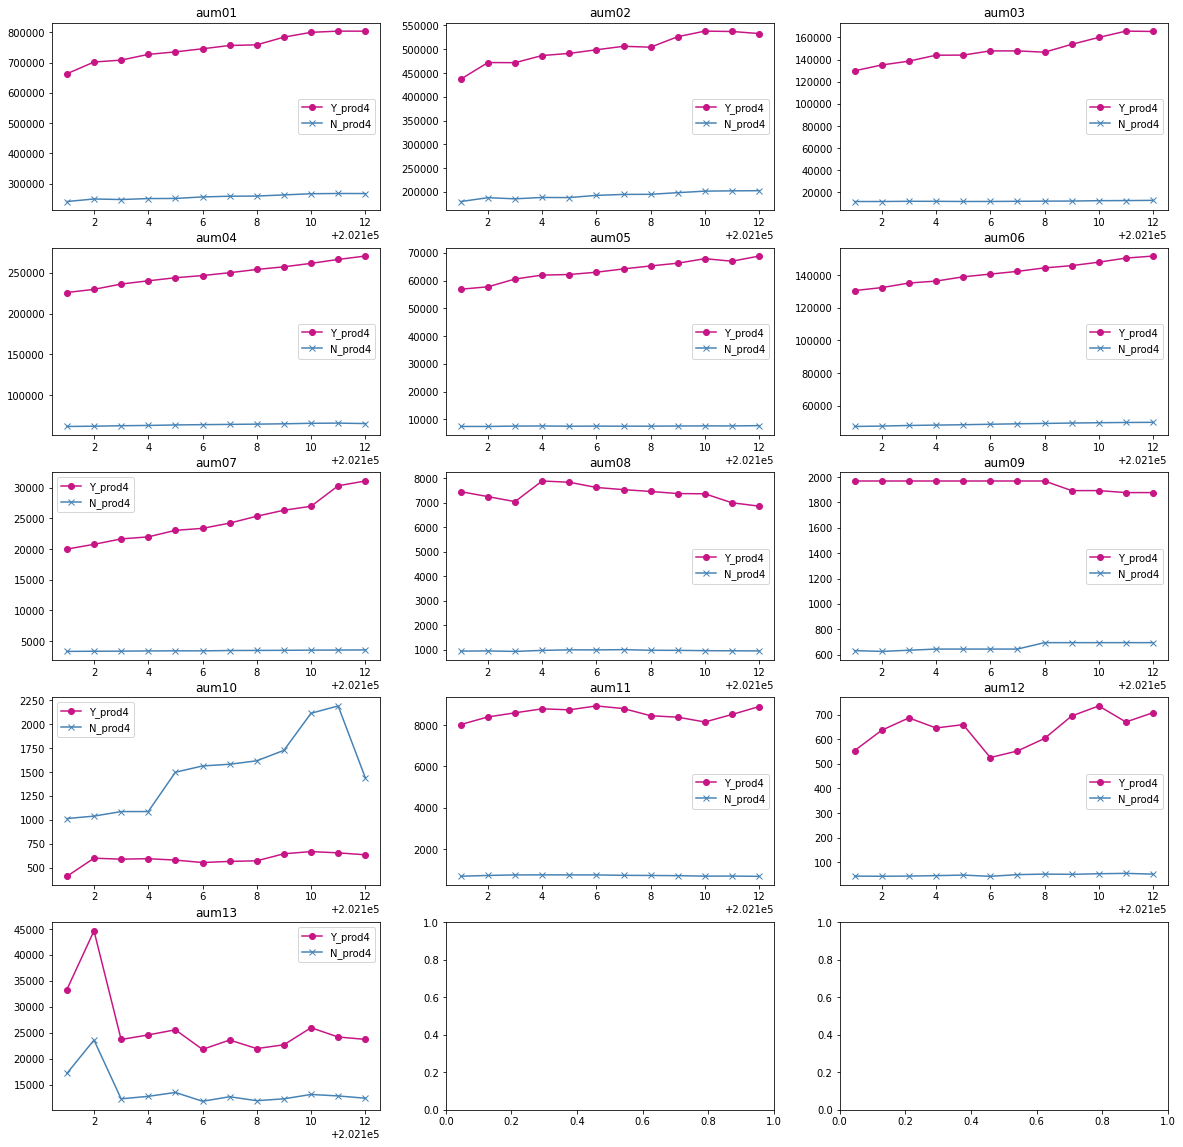

In [ ]:
aums = df.columns[df.columns.str.contains('aum')]
pos_aum = df[df['srno_2'].isin(pos_index)].groupby('yyyymm')[aums].mean()
neg_aum = df[df['srno_2'].isin(neg_index)].groupby('yyyymm')[aums].mean()

fig, ax = plt.subplots(5, 3, figsize=(20,20))

for i, aum in enumerate(aums):
    ax[i//3,i%3].set_title(aum)
    ax[i//3,i%3].plot(pos_aum[aum], marker='o', color='mediumvioletred', label='Y_prod4')
    ax[i//3,i%3].plot(neg_aum[aum], marker='x', color='steelblue', label='N_prod4')
    ax[i//3,i%3].legend()

In [ ]:
df['rs_prod_4c'] = rsprod_count.map(lambda x : x if x == 0 else 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


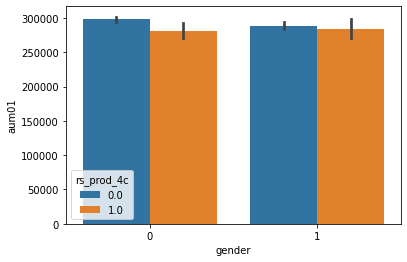

In [ ]:
sns.barplot('gender', 'aum01', hue='rs_prod_4c', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


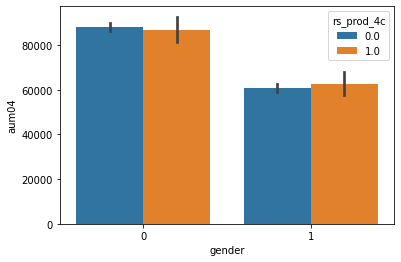

In [ ]:
sns.barplot('gender', 'aum02', hue='rs_prod_4c', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


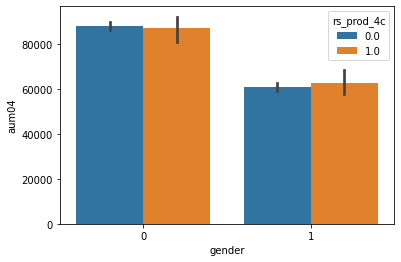

In [ ]:
sns.barplot('gender', 'aum04', hue='rs_prod_4c', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


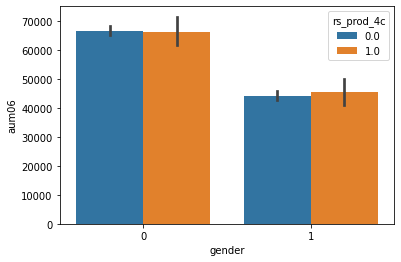

In [ ]:
sns.barplot('gender', 'aum06', hue='rs_prod_4c', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


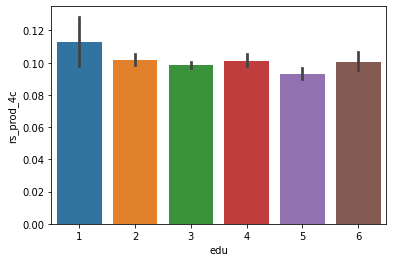

In [ ]:
rsprod_count = df.groupby('srno_2')['rs_prod_4'].sum()
df1['rs_prod_4c'] = rsprod_count.map(lambda x : x if x == 0 else 1)
sns.barplot('edu', 'rs_prod_4c', data=df1)

In [ ]:
def age_gruop(x):
    if x <= 48:
        return '30~48'
    else:
        return '49~50'
df1['age_group'] = df1['age'].map(age_gruop)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


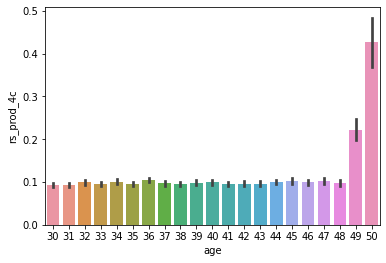

In [ ]:
sns.barplot('age', 'rs_prod_4c', data=df1)

In [ ]:
df2.groupby('srno_2').mean()

,yyyymm,aum01,aum02,aum03,aum04,aum05,aum06,aum07,aum08,aum09,...,inter_74,inter_75,inter_76,inter_77,inter_78,rs_prod_1,rs_prod_2,rs_prod_3,rs_prod_4,INV_ADV
srno_2,,,,,,,,,,,,,,,,,,,,,
1,202106.5,5.729600e+04,57296.000000,3215.250000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.166667,0.000000
2,202106.5,1.383548e+05,138354.750000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,202106.5,2.832156e+05,283215.583333,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,202106.5,1.147517e+04,11475.166667,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
5,202106.5,1.174866e+05,117486.583333,4065.916667,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.833333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199996,202106.5,1.605609e+06,638928.416667,1310.750000,9.666810e+05,0.000000e+00,966681.000000,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.083333,18.083333
199997,202106.5,6.803119e+05,680311.916667,71828.166667,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
199998,202106.5,7.679292e+04,30162.333333,0.000000,4.663083e+04,0.000000e+00,46630.833333,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.083333,0.0,0.083333,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


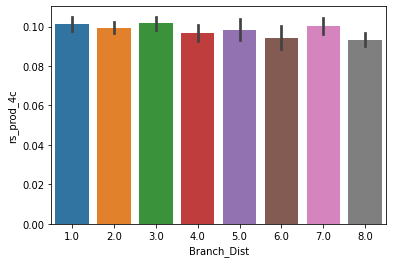

In [ ]:
sns.barplot('Branch_Dist', 'rs_prod_4c', data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


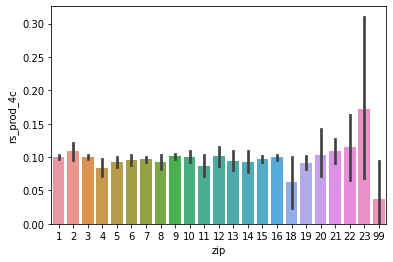

In [ ]:
sns.barplot('zip', 'rs_prod_4c', data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


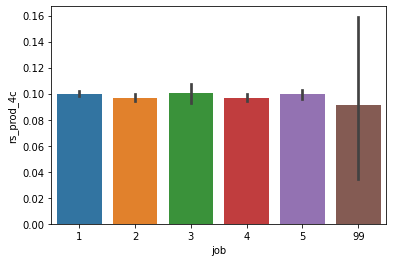

In [ ]:
sns.barplot('job', 'rs_prod_4c', data=df1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -qq ./drive/My\ Drive/merge_knn.zip

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import resample

In [ ]:
df_back1 = pd.read_csv('merge_knn.csv')

In [ ]:
# 至少換匯過一次的人
rsprod_count = df_back1.groupby('srno_2').sum()['rs_prod_4']
neg_index = rsprod_count[rsprod_count == 0].index  # 沒有換匯的會員index
pos_index = rsprod_count[rsprod_count != 0].index  # 有換匯的會員index

In [ ]:
#df_back1 = train.copy()
df_back1['rs_prod_4'] = df_back1['rs_prod_4'].shift(periods=-1)  # rs_prod上移一個月
df_back1 = df_back1[df_back1['yyyymm'] != 202112]                # 移除12月資料

In [ ]:
# sample
neg_index_sample = resample(neg_index,
             replace=False,
             n_samples=len(pos_index),
             random_state=1)

In [ ]:
len(np.concatenate((neg_index_sample, pos_index)))

39518

In [ ]:
#df_back1 = df_back1[df_back1['srno_2'].isin(pos_index)] # 篩選出有換匯過的人
df_norm = df_back1.drop(['srno_2','rs_prod_4'], axis=1) 
df_norm = (df_norm-df_norm.mean()) / df_norm.std() # standard normalization
#df_norm = df_norm.drop('zip_23', axis=1)  # zip23為0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_norm, df_back1['rs_prod_4'], test_size=0.2, random_state=1)

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=1)
X_train, y_train = smo.fit_resample(X_train, y_train)

In [ ]:
rf = RandomForestClassifier(random_state=0, max_depth=12, class_weight={1:1, 0:1.5})
rf.fit(X_train,y_train)
test_pred = rf.predict(X_test)
train_pred = rf.predict(X_train)

accuracy on training data: 0.8199180888386751
accuracy on testing data: 0.7741890959282264


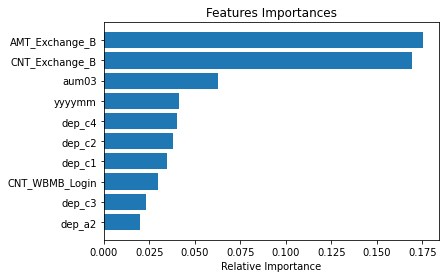

In [ ]:
print("accuracy on training data:",metrics.accuracy_score(y_train, train_pred))
print("accuracy on testing data:",metrics.accuracy_score(y_test, test_pred))
### importance visulizationd
features = X_train.columns
importances = rf.feature_importances_
index = np.argsort(importances)[-10:]
plt.title("Features Importances")
plt.barh(range(len(index)), importances[index], align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')
plt.show()

random Forest ROC AUC=0.677


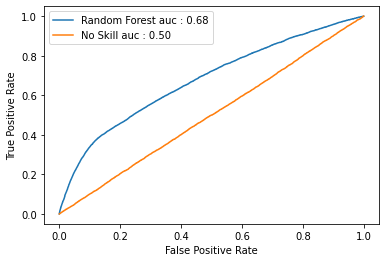

In [ ]:
ns_probs = [i for i in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)[::,1]
rf_auc = roc_auc_score(y_test, rf_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
 
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

plt.plot(rf_fpr, rf_tpr, label='Random Forest auc : {:.2f}'.format(rf_auc))
plt.plot(ns_fpr, ns_tpr, label='No Skill auc : {:.2f}'.format(ns_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
print('random Forest ROC AUC=%.3f' % (rf_auc))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
pred = rf.predict(X_test)
prfs = precision_recall_fscore_support(pred, y_test)
print(confusion_matrix(pred, y_test))
print(prfs)
print('precision : ', prfs[0][1])
print('recall : ', prfs[1][1])

[[30494  6820]
 [ 2996  3160]]
(array([0.91054046, 0.31663327]), array([0.81722678, 0.51332034]), array([0.86136376, 0.3916708 ]), array([37314,  6156]))
precision :  0.3166332665330661
recall :  0.5133203378817414


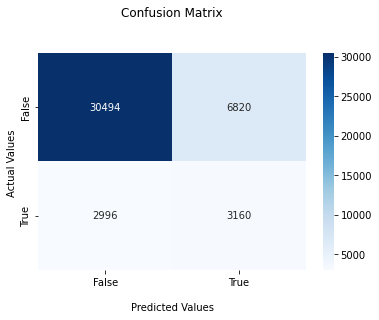

In [ ]:
ax = sns.heatmap(confusion_matrix(pred, y_test), annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

accuracy on training data: 0.8199180888386751
accuracy on testing data: 0.7741890959282264


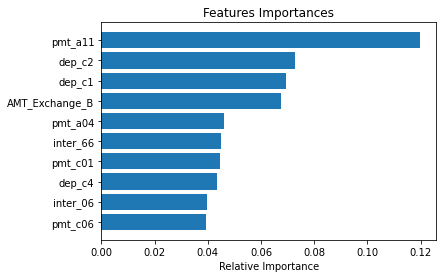

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators=200, class_weight={0:1, 1:1.3})
xgb.fit(X_train, y_train)
print("accuracy on training data:",metrics.accuracy_score(y_train, train_pred))
print("accuracy on testing data:",metrics.accuracy_score(y_test, test_pred))
### importance visulizationd
features = X_train.columns
importances = xgb.feature_importances_
index = np.argsort(importances)[-10:]
plt.title("Features Importances")
plt.barh(range(len(index)), importances[index], align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
pred = xgb.predict(X_test)
prfs = precision_recall_fscore_support(pred, y_test)
print(confusion_matrix(pred, y_test))
print('precision : ', prfs[0][1])
print('recall : ', prfs[1][1])

[[30211  6701]
 [ 3279  3279]]
precision :  0.3285571142284569
recall :  0.5


random Forest ROC AUC=0.679


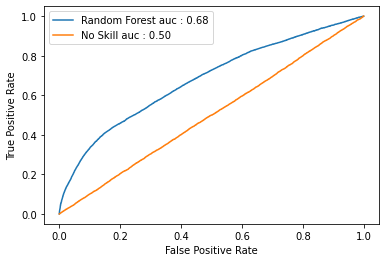

In [ ]:
ns_probs = [i for i in range(len(y_test))]
xgb_probs = xgb.predict_proba(X_test)[::,1]
rf_auc = roc_auc_score(y_test, xgb_probs)
ns_auc = roc_auc_score(y_test, ns_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, xgb_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

plt.plot(rf_fpr, rf_tpr, label='Random Forest auc : {:.2f}'.format(rf_auc))
plt.plot(ns_fpr, ns_tpr, label='No Skill auc : {:.2f}'.format(ns_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
print('random Forest ROC AUC=%.3f' % (rf_auc))